In [31]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# Generate the data
n = 2000
t = tfd.Uniform(low=-np.pi, high=np.pi).sample([n, 1])
r = 2 * (1 - tf.cos(t))
x = r * tf.sin(t) + tfd.Normal(loc=0., scale=0.1).sample([n, 1])
y = r * tf.cos(t) + tfd.Normal(loc=0., scale=0.1).sample([n, 1])

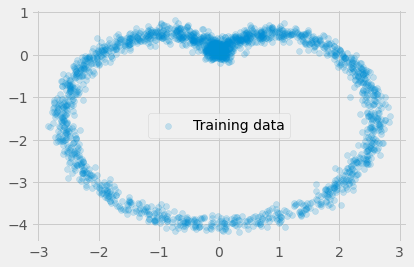

In [33]:
plt.scatter(x, y, alpha=.2, label='Training data')
plt.legend()
plt.show()

In [17]:
# Model the distribution of y given x with a Mixture Density Network.
event_shape = 1

num_components = 6

params_size = tfpl.MixtureSameFamily.params_size(
    num_components,
    component_params_size=tfpl.IndependentNormal.params_size(event_shape))

In [18]:
params_size

18

In [22]:
# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(params_size, activation=None),
  tfpl.MixtureSameFamily(
      num_components=num_components, 
      component_layer=tfpl.IndependentNormal(event_shape)),
])

def neg_loglik(y_true, y_pred):
  return -y_pred.log_prob(y_true)

In [25]:
# Fit the model
batch_size = 100
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.02),
              loss=neg_loglik)

model.fit(x, y,
          batch_size=batch_size,
          epochs=20,
          steps_per_epoch=n // batch_size)

Epoch 1/20
20/20 [==============================] - 1s 2ms/step - loss: 1.9710
Epoch 2/20
20/20 [==============================] - 0s 1ms/step - loss: 1.4463
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 1.2087
Epoch 4/20
20/20 [==============================] - 0s 1ms/step - loss: 1.0206
Epoch 5/20
20/20 [==============================] - 0s 1ms/step - loss: 0.8226
Epoch 6/20
20/20 [==============================] - 0s 1ms/step - loss: 0.6732
Epoch 7/20
20/20 [==============================] - 0s 1ms/step - loss: 0.5352
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4571
Epoch 9/20
20/20 [==============================] - 0s 1ms/step - loss: 0.3999
Epoch 10/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3797
Epoch 11/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 12/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 13/20
20/20 [==============================

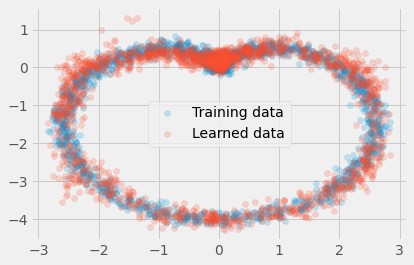

In [36]:
y_pred = model(x).sample(1)

plt.scatter(x, y, alpha=.2, label='Training data')
plt.scatter(x, y_pred, alpha=.2, label='Learned data')
plt.legend()
plt.show()